Script to plot the reciprocal space of a twisted polaritonic crystal (PC) on an in-plane anisotropic material (MoO3 as example). The derivations are based on thin layer approximation.

# Open the packages for the script

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define some useful functions for the code
cos = np.cos
sin = np.sin
pi = np.pi

## Define the function of the permittivity of MoO3
Parameters from paper: https://onlinelibrary.wiley.com/doi/abs/10.1002/adma.201908176

In [3]:
def eps_harm_Osc(w, wT, wL, gamma):
    eps_h = (w*w-wL**2+1j*gamma*w)/(w*w-wT**2+1j*gamma*w)
    return eps_h

In [4]:
def eps_MoO3(w, axis):
    if(axis=='[100]'): # x-axis of MoO3
        epsinf = 6.09
        gamma = np.array([[73, 11.9, 2.1]])
        wTO = np.array([[507, 822.7, 998.8]])
        wLO = np.array([[534, 978.8, 999.5]])

    if(axis=='[001]'): # z-axis of MoO3
        epsinf = 6.38
        gamma = np.array([[17.9]])
        wTO = np.array([[544.9]])
        wLO = np.array([[855.8]])

    if(axis=='[010]'): # y-axis of MoO3
        epsinf = 4.4
        gamma = np.array([[0.7]])
        wTO = np.array([[963]])
        wLO = np.array([[1006.6]])

    eps = np.ones(np.shape(w)[0],)
    for i in range(np.shape(wTO)[1]):
        eps = eps*eps_harm_Osc(w,wTO[0,i],wLO[0,i],gamma[0,i])

    eps = epsinf*eps

    return eps

# Calculate the reciprocal lattice

In [19]:
# Inputs:
L = 0.9 # Modulus of the vector basis for hole array in um
mn1 = 7 # nº of harmonics to plot in the L1 direction
mn2 = 7 # nº of harmonics to plot in the L2 direction
d = 0.4/2 # Radius of the holes in um

# Calculate the lattice vectors (square lattice, for another lattice change the vectors)
L1 = np.array([[L,0]])
L2 = np.array([[0,L]])

# Reciprocal vector basis
g1 = np.array([[2*pi/L1[0,0],-2*pi*L2[0,0]/(L2[0,1]*L1[0,0])]])
g2 = np.array([[0,2*pi/L2[0,1]]])

# Reciprocal space points
Px = np.zeros((mn1*2+1,mn2*2+1))
Py = np.zeros((mn1*2+1,mn2*2+1))

for i in range(-mn1,mn1+1,1):
    for j in range(-mn2,mn2+1,1):
        Px[i,j] = i*g1[0,0]+j*g2[0,0]
        Py[i,j] = i*g1[0,1]+j*g2[0,1]


# Calculate the in-plane IFC
Formula from the article: https://journals.aps.org/prb/abstract/10.1103/PhysRevB.100.235408

In [63]:
# Inputs:

w = np.array([[915.6]]) # Frequency in cm^-1
e3 = 1 # Permittivity of the substrate
e1 = 1 # Permittivity of the superstrate
t = 0.1 # Thickness of the layer, in um
l = 0 # Order of the mode
npsi = 1000 # Partition in in-plane angle
theta = pi/6 # Twist angle

# Script:

# Momentum and wavelength
lam = 10**4/w
k0 = 2*pi/lam

# Permittivity of the material
epsx = eps_MoO3(w, '[100]')
epsy = eps_MoO3(w, '[001]')
epsz = eps_MoO3(w, '[010]')
print(np.abs(epsx[0,0]))

4.345478835313129


Different angle ranges depending on hyperbolic or elliptical dispersion

Elliptical:

In [25]:
# Partition in in-plane angle
psi = np.linspace(0,2*pi,npsi)

# Analytical expression for momentum as a function of the angle
rho = 1j*np.sqrt(epsz/(epsx*np.cos(psi)**2+epsy*np.sin(psi)**2))
q = rho/(k0*t)*(np.atan(e1*rho/epsz)+np.atan(e3*rho/epsz)+l*np.pi)

Hyperbolic in X direction

In [64]:
# Partition in in-plane angle
psi1 = np.linspace(-np.atan(np.sqrt(np.abs(epsx[0,0])/np.abs(epsy[0,0]))),np.atan(np.sqrt(np.abs(epsx[0,0])/np.abs(epsy[0,0]))),int(npsi/2))
psi2 = np.linspace(pi-np.atan(np.sqrt(np.abs(epsx[0,0])/np.abs(epsy[0,0]))),pi+np.atan(np.sqrt(np.abs(epsx[0,0])/np.abs(epsy[0,0]))),int(npsi/2))
psi = np.concatenate((psi1,psi2))

# Analytical expression for momentum as a function of the angle
rho = 1j*np.sqrt(epsz/(epsx*np.cos(psi)**2+epsy*np.sin(psi)**2))
q = rho/(k0*t)*(np.atan(e1*rho/epsz)+np.atan(e3*rho/epsz)+l*np.pi)

Hyperbolic in Y direction

In [50]:
# Partition in in-plane angle
psi1 = np.linspace(np.atan(np.sqrt(np.abs(epsx[0,0])/np.abs(epsy[0,0]))),pi-np.atan(np.sqrt(np.abs(epsx[0,0])/np.abs(epsy[0,0]))),int(npsi/2))
psi2 = np.linspace(pi+np.atan(np.sqrt(np.abs(epsx[0,0])/np.abs(epsy[0,0]))),2*pi-np.atan(np.sqrt(np.abs(epsx[0,0])/np.abs(epsy[0,0]))),int(npsi/2))
psi = np.concatenate((psi1,psi2))

# Analytical expression for momentum as a function of the angle
rho = 1j*np.sqrt(epsz/(epsx*np.cos(psi)**2+epsy*np.sin(psi)**2))
q = rho/(k0*t)*(np.atan(e1*rho/epsz)+np.atan(e3*rho/epsz)+l*np.pi)

# Plot the reciprocal points of the lattice

<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Nathaniel\AppData\Local\Temp\ipykernel_18548\2786778281.py:2: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("$k_x (\mu m^{-1})$")
C:\Users\Nathaniel\AppData\Local\Temp\ipykernel_18548\2786778281.py:3: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$k_y (\mu m^{-1})$")


Text(0, 0.5, '$k_y (\\mu m^{-1})$')

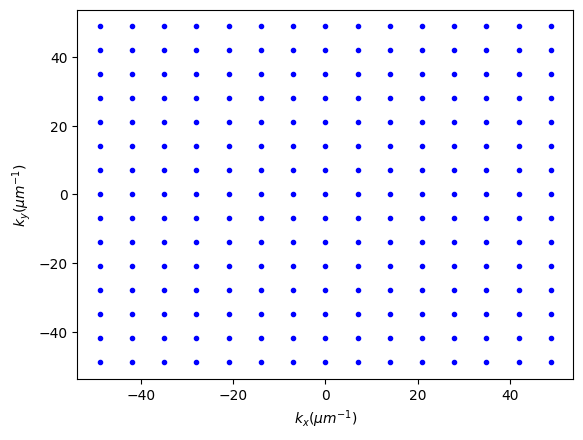

In [54]:
plt.plot(Px,Py,'.b')
plt.xlabel("$k_x (\mu m^{-1})$")
plt.ylabel("$k_y (\mu m^{-1})$")

# Plot the twisted IFC of the material

Text(0, 0.5, '$q_y$')

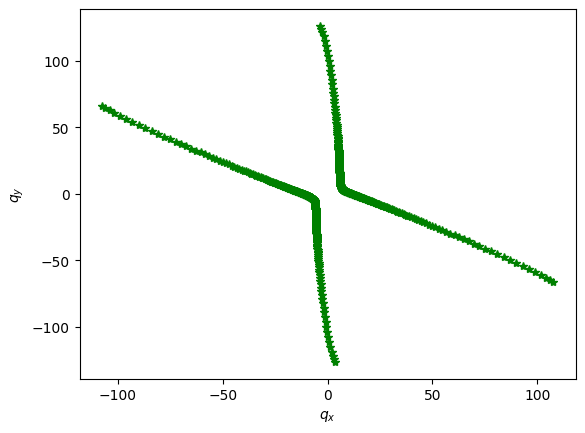

In [65]:
# Non-twisted momentum
qx = np.abs(q)*np.cos(psi)
qy = np.abs(q)*np.sin(psi)

# Twisted momentum an angle theta
qxx = -qy*sin(theta)+qx*cos(theta)
qyy = qx*sin(theta)+qy*cos(theta)

plt.plot(np.real(qxx),np.real(qyy),'g*')
plt.xlabel("$q_x$")
plt.ylabel("$q_y$")

# Plot the IFC together with reciprocal lattice

Bragg resonance condition is fullfiled when IFC coincides with one reciprocal space point

(-50.0, 50.0)

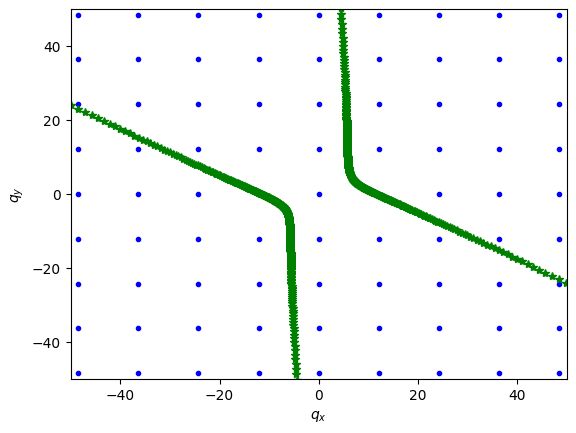

In [72]:
plt.plot(Px/k0[0,0],Py/k0[0,0],'.b')
plt.plot(np.real(qxx),np.real(qyy),'*g')
plt.xlabel("$q_x$")
plt.ylabel("$q_y$")
plt.xlim((-50,50))
plt.ylim((-50,50))